# Announcements - Wednesday, October 18

* Download ALL files from Canvas for today's lecture
* P6 due today
* Quiz 5 Released tonight at 5 pm (<b>please read the instructions carefully before taking the quiz</b>)
* If you have questions, it is almost always faster to 
  * Post on Piazza
  * Go to [office hours](https://sites.google.com/wisc.edu/cs220-oh-f23/home?pli=1) 
* [Thank You](https://docs.google.com/forms/d/e/1FAIpQLSfeBW4gVkm8y-Z3JHvmz1OmvW8Db_12f2xaPhR5Np2ECNEWFw/viewform)
* [Complain Here](https://docs.google.com/forms/d/e/1FAIpQLSctgF9sQSVbMwObD0MXQfZGoU6yjewUce0LQtbPOdZ9uKmG0g/viewform)
### Conflict Form
  * [Exam 2 - November 8, 5:45 pm](https://cs220.cs.wisc.edu/f23/surveys.html)
  * [Final - December 19, 7:45 am](https://cs220.cs.wisc.edu/f23/surveys.html)

# Dictionaries 2 - Combining Dictionaries and Lists (nested data structures)

In [1]:
import csv

### Warmup 1: Answer these questions about dictionaries

In [2]:
# Keys can be what type? :     Any type that is ____immutable____________
# Values can be what type? :   Any type (including other dictionaries & lists)
# Indexing? .... yes/no        No (lookup is not the same as indexing)
# Slicing? ..... yes/no        No
# Mutable?......yes/no         Yes

In [3]:
# inspired by https://automatetheboringstuff.com/2e/chapter16/
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")  
    exampleReader = csv.reader(exampleFile) 
    exampleData = list(exampleReader)        
    exampleFile.close()  
    return exampleData

survey_data = process_csv('cs220_survey_data.csv')

### Warmup 2a: Split csv data into header and data

In [4]:
cs220_header = survey_data[0]
cs220_data = survey_data[1:]
cs220_header

['section',
 'Lecture',
 'Age',
 'Primary major',
 'Other Primary Major',
 'Other majors',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Pizza topping',
 'Cats or dogs',
 'Runner',
 'Sleep habit',
 'Procrastinator',
 'Song']

### Warmup 2b: Display the first 3 data rows

In [5]:
cs220_data[:3]

[['COMP SCI 220:LEC003, COMP SCI 220:LAB333',
  'LEC003',
  '19',
  'Other (please provide details below).',
  'Atmospheric and Oceanic Science',
  '',
  '53703',
  '44.256',
  '-88.409',
  'basil/spinach',
  'cat',
  'No',
  'early bird',
  'Yes',
  'Kanye'],
 ['COMP SCI 220:LAB344, COMP SCI 220:LEC004',
  'LEC004',
  '19',
  'Engineering: Biomedical',
  '',
  '',
  '53711',
  '51.5072',
  '-0.1257',
  'Other',
  'dog',
  'No',
  'night owl',
  'Yes',
  'Eyes Closed by Ed Sheeran\xa0'],
 ['COMP SCI 220:LAB342, COMP SCI 220:LEC004',
  'LEC004',
  '',
  'Computer Science',
  '',
  '',
  '53703',
  '37.7749',
  '-122.4194',
  'pineapple',
  'dog',
  'Yes',
  'night owl',
  'Yes',
  'Eight - IU']]

In [6]:
def cell(data, header, row_idx, col_name):
    """
    Returns the data value (cell) corresponding to the row index and 
    the column name of a CSV file.
    """
    col_idx = header.index(col_name) 
    val = data[row_idx][col_idx]  
    
    # handle missing values, by returning None
    if val == '':
        return None
    
    # handle type conversions
    if col_name in ["Age", ]:
        return int(val)
    elif col_name in ['Latitude', 'Longitude']:
        return float(val)
    
    return val

### Warmup 3: Make a dictionary of frequency of `Major`

- Initialize empty `dict` into a variable called `major_freq`
- Iterate over the data:
    - Extract required column's data
    - Make sure to handle missing data
    - Check if current value of the column is a key in your `dict`:
        - yes, update the count
        - no, insert new key-value pair

In [7]:
# TODO: iterate over each student's data from cs220_data
# TODO: extract "Major" column's value 
# TODO: check if current student's major already a key in major_freq
#            - if yes, increase the corresponding value by 1
#            - if no, insert a new key-value pair

major_freq = {} # KEY: unique major; VALUE: count of unique major

for row_idx in range(len(cs220_data)):
    major = cell(cs220_data, cs220_header, row_idx, "Primary major")
    if major not in major_freq:
        major_freq[major] = 1
    else:
        major_freq[major] += 1
        
major_freq

{'Other (please provide details below).': 178,
 'Engineering: Biomedical': 46,
 'Computer Science': 77,
 'Engineering: Other': 30,
 'Data Science': 179,
 'Mathematics/AMEP': 28,
 'Engineering: Mechanical': 203,
 'Business: Information Systems': 25,
 'Statistics': 21,
 'Business: Finance': 44,
 'Science: Biology/Life': 32,
 'Science: Other': 32,
 'Business: Other': 25,
 'Engineering: Industrial': 66,
 'Science: Chemistry': 4,
 'Science: Physics': 10,
 'Business: Actuarial': 17,
 'Languages': 2}

### What is the most common `Major` among CS220 / CS319 students?

In [8]:
most_used_key = None  
max_value = None

for major in major_freq:
    if max_value == None or major_freq[major] > max_value:
        max_value = major_freq[major]
        most_used_key = major

print("The major \"{}\" appeared {} times.".format(str(most_used_key), max_value))

The major "Engineering: Mechanical" appeared 203 times.


### Learning Objectives:
 - Handle key errors with get and pop using default values
 - Understand the idea of nesting data structures
 - Use a dictionary of lists to put rows of data into "buckets"
 - Use a list of dictionaries to represent a table of data.
 - Create a dictionary of dictionaries

### Default values with `get` and `pop` methods.

In [9]:
suffix = {1: "st", 2: 'nd', 3: "rd"}
suffix.get(1)

# TODO: what happens when you try to get a key that is not there? Try it.
print(suffix.get(4))

# TODO: what happens whey you try to pop a key that is not there? Try it.
# suffix.pop(10) # KeyError

None


`get` and `pop` methods accept a second argument, which will be the default value if the first argument (key) does not exist.

Syntax:
- `some_dict.get(some_key, default_value)`
- `some_dict.pop(some_key, default_value)`

In [10]:
# get(key, default value) 
print(suffix.get(3, 'th'))
print(suffix.get(5, 'th')) #default value, but does not add the key-value pair to the dict

# pop(key, default value)
print(suffix.pop(7, 'th')) # no key-value pair to remove
print(suffix.pop(2, 'th'))
print(suffix)

rd
th
th
nd
{1: 'st', 3: 'rd'}


### What are nested data structures?
A data structure containing another data structure as item is called as nest data structure.

## Nesting part 1: Bucketizing/Binning

<div>
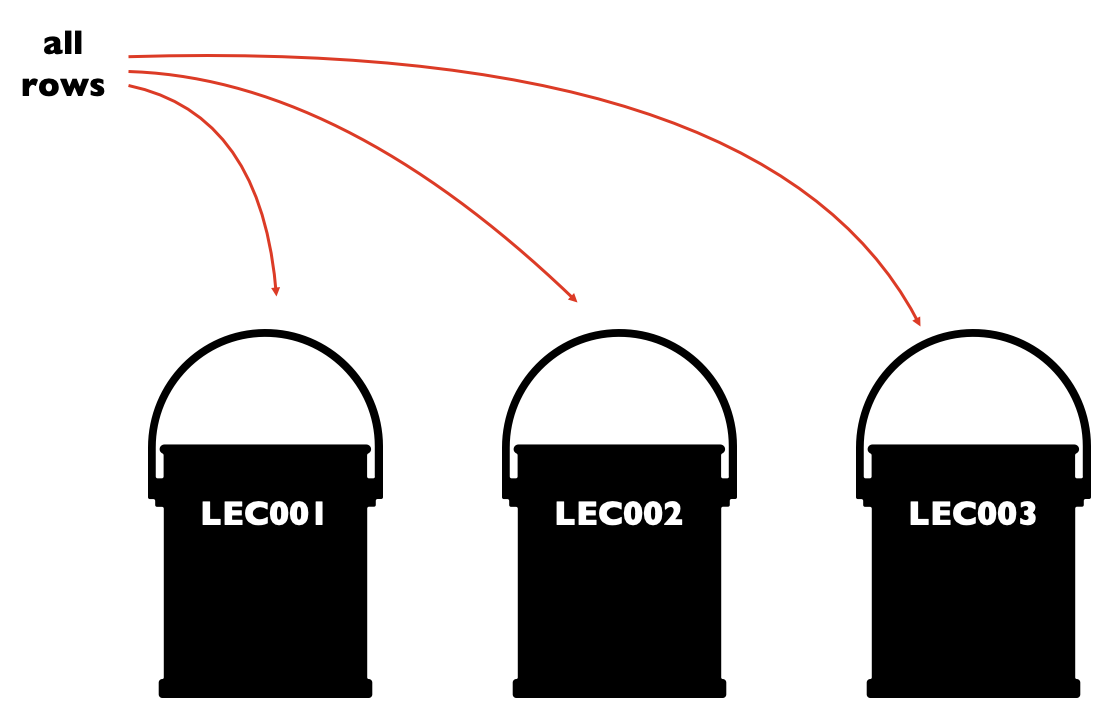
</div>

<div>
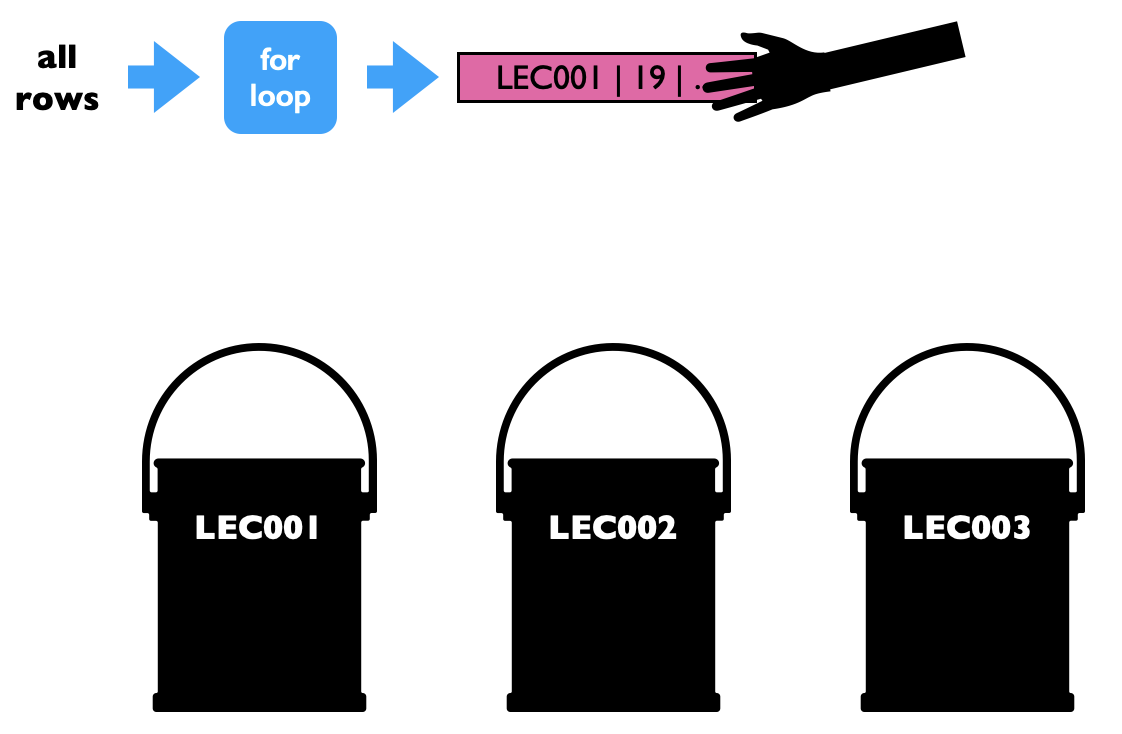
</div>

<div>
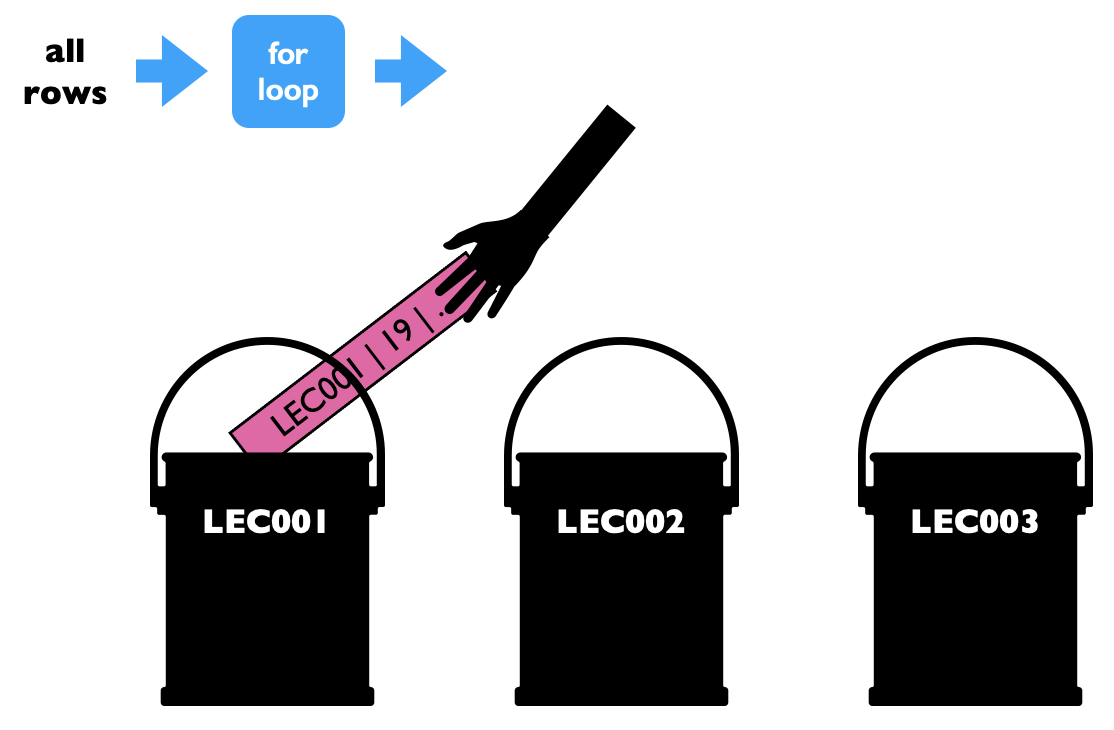
</div>

Bucketizing/Binning process objective: build dict of list of lists data structure
- Initialize an empty `dict`
- Iterate over every row in your dataset
    - Retrieve value of the column based on which you want to bucketize
    - Check if bucketizing column is already a key in your `dict`:
        - if no, insert a new key-value pair:
            - key: unique value of bucktizing column
            - value: initialize a new list, append current row as an item into the list, thereby creating a list of list data structure
        - if yes, append current row to the list of list data structure (value of the key).

After this process, each row ends up in a bin, based on the value of the bucketize column.
Number of bins = number of unique values in the bucketize column

Why bucketize data?
- A way to organize our data, without losing information in the process

In [11]:
# Let's take another look at our 'cs220_survey_data.csv'
cs220_header

['section',
 'Lecture',
 'Age',
 'Primary major',
 'Other Primary Major',
 'Other majors',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Pizza topping',
 'Cats or dogs',
 'Runner',
 'Sleep habit',
 'Procrastinator',
 'Song']

In [12]:
# Let's bucketize the data

def bucketize(data, header, bucket_column):
    buckets = dict() # Key: unique bucketize column value; \
    # Value: list of lists (rows having that unique column value)

    for row_idx in range(len(data)):
        row = data[row_idx]
        col_val = cell(data, header, row_idx, bucket_column)
        if col_val == None:
            continue
        if col_val not in buckets:
            # no existing bucket
            buckets[col_val] = []
        # must append row in both cases (new bucket and existing bucket)
        buckets[col_val].append(row)

    return buckets

In [13]:
lec_buckets = bucketize(cs220_data, cs220_header, "Lecture")
# lec_buckets

In [14]:
major_buckets = bucketize(cs220_data, cs220_header, "Primary major")
# major_buckets

Let's convert the above code into a function called 'bucketize'.

In [15]:
def col_avg(data, header, col_name, min_bound, max_bound):
    """
    data: list of list data structure representing rows
    col_name: name of the column for which we want to compute average
    min_bound, max_bound: bounds for the data (data cleaning)
    Returns average of that column.
    """
    total = 0
    count = 0
    for row_idx in range(len(data)):
        col_data = cell(data, header, row_idx, col_name)
        # handle bounds checking
        if col_data != None:
            if col_data > min_bound and col_data < max_bound:
                total += col_data
                count += 1
    
    if count == 0:
        return 0 # or whatever is the expected return value
    return round(total / count, 2) # implicit else
    
min_age = 0
max_age = 125
col_avg(cs220_data, cs220_header, "Age", min_age, max_age)

19.43

### Average per bucket

In [16]:
def avg_per_bucket(buckets, avg_col_name, min_bound, max_bound):
    """
    Computes and returns column average per bucket
    """
    averages = {} # Key: bucket name; Value: bucket average
    for bucket_name in buckets:
        averages[bucket_name] = col_avg(buckets[bucket_name], \
                                       cs220_header, avg_col_name, min_bound, max_bound)
    return averages

### What is the average student age per lecture?

In [17]:
avg_per_bucket(lec_buckets, "Age", 0, 125)

{'LEC003': 19.32,
 'LEC004': 19.51,
 'LEC005': 19.13,
 'LEC001': 19.51,
 'LEC002': 19.47}

### What is the average student age in each major?

In [18]:
avg_per_bucket(major_buckets, "Age",  0, 125)

{'Other (please provide details below).': 19.98,
 'Engineering: Biomedical': 19.2,
 'Computer Science': 19.42,
 'Engineering: Other': 20.43,
 'Data Science': 19.02,
 'Mathematics/AMEP': 19.29,
 'Engineering: Mechanical': 18.9,
 'Business: Information Systems': 19.75,
 'Statistics': 19.6,
 'Business: Finance': 19.65,
 'Science: Biology/Life': 19.71,
 'Science: Other': 20.76,
 'Business: Other': 20.29,
 'Engineering: Industrial': 18.65,
 'Science: Chemistry': 20.25,
 'Science: Physics': 20.4,
 'Business: Actuarial': 20.0,
 'Languages': 19.5}

## Nesting part 2: Tables
### Use a list of dictionaries to represent a table of data.

<div>
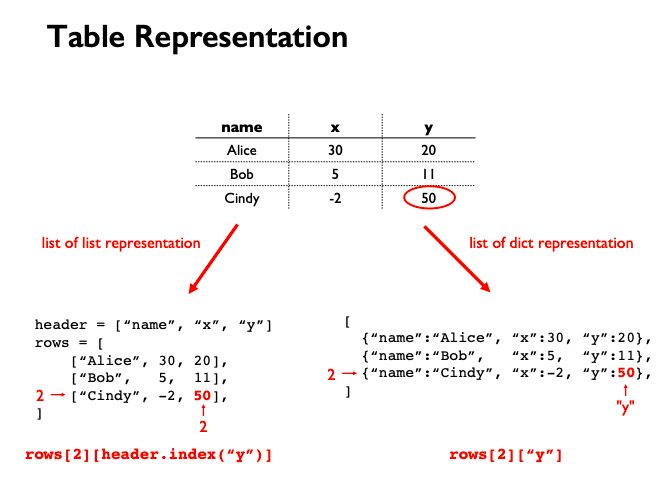
</div>

Steps (build a list of dictionaries)
- Start with an empty list
- Each row of data is one dictionary
    - keys are the column names
    - values are the data in each cell

Why put data in table form?
- It seems redundant, but is used often in Web apps for storing info.
- Its a little easier to access subsets of the data without worrying about the header index method.

In [19]:
# Let's put the student survey data into a list of dictionaries
cs220_header

['section',
 'Lecture',
 'Age',
 'Primary major',
 'Other Primary Major',
 'Other majors',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Pizza topping',
 'Cats or dogs',
 'Runner',
 'Sleep habit',
 'Procrastinator',
 'Song']

In [20]:
def transform(header, data):
    """
    Transform data into a list of dictionaries
    """
    transformed_data = [] #should be defined outside the for loop, because it stores the entire data
    for row in data:
        #should be defined inside the for loop, because it represents one row as a dictionary
        row_dict = {} # Key: header; Value: data
        for idx in range(len(row)):
            row_dict[header[idx]] = row[idx]
        transformed_data.append(row_dict)
    return transformed_data
    
transformed_data = transform(cs220_header, cs220_data)

In [21]:
# transformed_data

### What `Lecture` is the first student part of?

In [22]:
print(transformed_data[0]["Lecture"])

LEC003


### What is the `Major` of the last student?

In [23]:
print(transformed_data[-1]["Primary major"])

Other (please provide details below).


## Nesting part 3: Dictionary of Dictionaries

https://www.w3schools.com/python/python_dictionaries_nested.asp

In [24]:
# dict of dicts example:

nested_english_dict = {
    "shenanigans": {
        "definition": "silly or high-spirited behavior; mischief.",
        "usage": "widespread financial shenanigans had ruined the fortunes of many",
        "fun_to_say": 7 # on a scale of 1-10
    },
    "bamboozle": {
        "definition": "fool or cheat (someone).",
        "usage": "Tom Sawyer bamboozled the neighborhood boys into painting for him",
        "fun_to_say": 8 # on a scale of 1-10
    },
    "gubbins": {
        "definition": "(objects) of little to no value.",
        "usage": "I cleared all the gubbins off my desk before I started working",
        "fun_to_say": 10 # on a scale of 1-10
    },
    "malarkey": {
        "definition": "meaningless talk; nonsense.",
        "usage": "don't give me that malarkey",
        "fun_to_say": 5 # on a scale of 1-10
    },
    "gnarly": {
        "definition": "gnarled.",
        "usage": "twisted trees and gnarly roots",
        "fun_to_say": 2 # on a scale of 1-10
    }
}

# TODO: pick a word and add an inner dict

### How can we use "bamboozle"?

In [25]:
nested_english_dict["bamboozle"]["usage"]

'Tom Sawyer bamboozled the neighborhood boys into painting for him'

### Create a list of words with fun_to_say score greater than 7.

In [26]:
fun_to_say_words = []

for word in nested_english_dict:
    fun_to_say = nested_english_dict[word]["fun_to_say"]
    if fun_to_say > 7:
        fun_to_say_words.append(word)

fun_to_say_words

['bamboozle', 'gubbins']